In [93]:
pip install emoji

In [106]:
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#download stop-words
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
# For data cleaning
def clean(text):
    #Removing links, #tag , @mentions
    text = re.sub(r'@ [A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)    
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    
    
    text = " ".join(text.split())
    text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI) 
    text = text.replace("_", " ") 
    #Removing non-English words
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
  
    
    return text

In [108]:

df = pd. read_csv('tweet data.csv', encoding="latin-1")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [109]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [110]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [111]:
df.drop(['id'], axis = 1)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [112]:
df['SentimentText']=df['tweet'].apply(clean)

In [113]:
count = (df['label'] == 0).sum()
count

29720

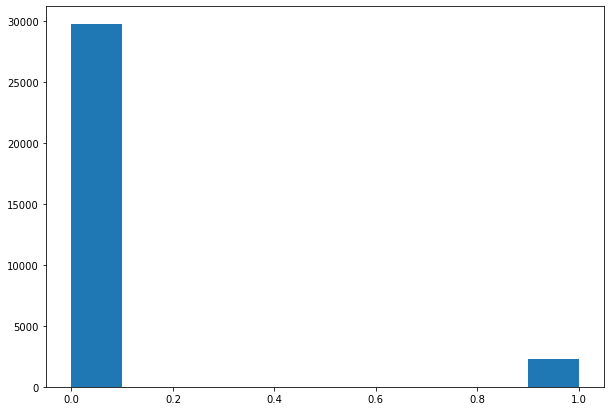

In [114]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['label'])
plt.show()

In [115]:
# Cleaning and formatting data
corpus = []
for i in range(0, len(df)):
    mgs = re.sub('[^a-zA-Z]', ' ', df['SentimentText'][i])
    mgs = mgs.lower()
    mgs = mgs.split()
    #removing stopwords
    mgs = [wordnet.lemmatize(word) for word in mgs if not word in set(stopwords.words('english'))]
    mgs = ' '.join(mgs)
    corpus.append(mgs)

    
# Creating the TF-IDF model
    
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray() 
y = df['label']

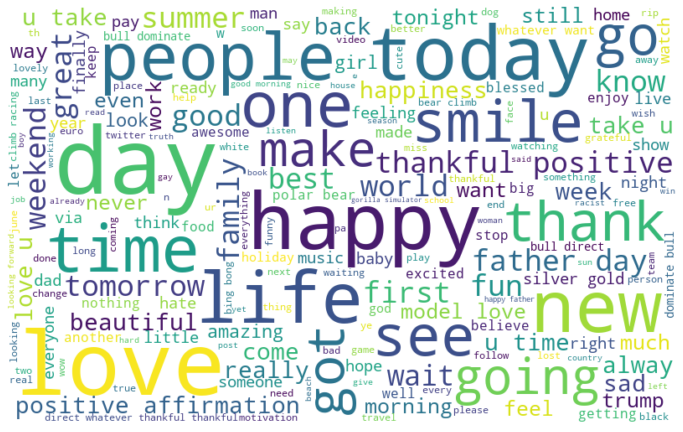

In [116]:
all_words = ' '.join([text for text in corpus])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [119]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train, y_train)


# Training model using Stochastic Gradient Descent
#sentiment_model=SGDClassifier().fit(X_train, y_train)



y_pred=sentiment_model.predict(X_test)    

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

#Accuracy percentage
print(accuracy*100)

94.03483157784962
